Marcos Lopes (PECE/USP) -- 2025

# Mac-Morpho

Corpus de sentenças cuja fonte são notícias da Folha de S. Paulo no ano de 1994. Etiquetado morfossintaticamente por humanos (padrão ouro).

In [1]:
# Download do corpus

import nltk
nltk.download('mac_morpho')

[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.


True

In [2]:
# Uso das sentenças não etiquetadas (como se fosse um corpus de texto "puro")

sents = nltk.corpus.mac_morpho.sents()
sents[:2]

[['Jersei',
  'atinge',
  'média',
  'de',
  'Cr$',
  '1,4',
  'milhão',
  'em',
  'a',
  'venda',
  'de',
  'a',
  'Pinhal',
  'em',
  'São',
  'Paulo'],
 ['Programe',
  'sua',
  'viagem',
  'a',
  'a',
  'Exposição',
  'Nacional',
  'do',
  'Zebu',
  ',',
  'que',
  'começa',
  'dia',
  '25']]

In [9]:
# Palavras etiquetadas

palavras_etiquetas = nltk.corpus.mac_morpho.tagged_words()
print(palavras_etiquetas[:5])
print(len(palavras_etiquetas))

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ('de', 'PREP'), ('Cr$', 'CUR')]
1170095


# Criação de um etiquetador morfossintático (POS-tagger)

Impressione seus amigos com um POS-tagger criado inteiramente por você -- e com três linhas de programação...

Antes de começar, vamos aprender a usar o método `get()` dos dicionários do Python. Ele oferece dois recursos importantes:

* Quando se consulta uma chave inexistente, ele não retorna um erro;
* O método permite que seja declarado um valor por default que será automaticamente retornado quando são buscadas chaves inexistentes.

In [10]:
d = {'abacate': 'n', 'beber': 'v'}

In [11]:
d['beber']

'v'

In [12]:
# Lembre-se: chamar uma chave inexistente no dicionário dá erro
d['uva']

KeyError: 'uva'

In [13]:
# Uma solução para o erro de chave é usar o método dict.get()

d = {'abacate': 'n', 'beber': 'v'}
print(d.get('beber', 'Chave desconhecida.'))
print(d.get('uva', 'Chave desconhecida.'))

v
Chave desconhecida.


In [14]:
# Criação do dicionário de etiquetas por Compreensão de Dicionário (não de lista)

dic_pos = {palavra.lower(): pos for (palavra, pos) in palavras_etiquetas}
print(len(dic_pos))
dic_pos['média']

59911


'ADJ'

In [15]:
# Criação de uma função de etiquetagem simplificada,
# baseada no dicionário de etiquetas

def tag(sentenca: str) -> list:
    palavras = sentenca.lower().split()
    return [(p, dic_pos.get(p, '<??>')) for p in palavras]

In [16]:
# Experimente!

tag('Não consigo pensar em uma sentença com uma palavra que não exista no meio daquelas um milhão de palavras')

[('não', 'ADV'),
 ('consigo', 'V'),
 ('pensar', 'V'),
 ('em', 'PREP|+'),
 ('uma', 'ART'),
 ('sentença', 'N'),
 ('com', 'PREP'),
 ('uma', 'ART'),
 ('palavra', 'N'),
 ('que', 'KS'),
 ('não', 'ADV'),
 ('exista', 'V'),
 ('no', 'KC'),
 ('meio', 'NUM'),
 ('daquelas', '<??>'),
 ('um', 'ART'),
 ('milhão', 'N'),
 ('de', 'PREP'),
 ('palavras', 'N')]

# POS-tagging com spaCy

In [17]:
# Instalação/atualização do spaCy e dos modelos de língua
!pip install -U spacy

!python -m spacy download pt_core_news_sm  # Notar o "sm": Small Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 69.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
# Importação do módulo e do modelo de língua
import spacy
nlp = spacy.load('pt_core_news_sm')

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'pt_core_news_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [19]:
# Documento de exemplo
texto = 'Águas passadas não movem moinhos'

In [20]:
# Outro exemplo bobo, mas que mostra que a POS de uma palavra (ex. "francês")
# é alterada conforme o contexto (substantivo ou adjetivo)

texto = 'O pão francês não foi entregue hoje.'

In [21]:
doc = nlp(texto)

In [22]:
for token in doc:
    print(token.text, token.pos_)

O DET
pão NOUN
francês ADJ
não ADV
foi AUX
entregue VERB
hoje ADV
. PUNCT


# Análise de Dependências

In [23]:
doc = nlp('João chutou a bola.')
for token in doc:
    print(token.text, token.dep_)

João nsubj
chutou ROOT
a det
bola obj
. punct


In [24]:
# Exibição gráfica das dependências
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True)

In [25]:
# Caso você queira gravar a imagem gerada em arquivo...
from pathlib import Path

svg = displacy.render(doc, style='dep', jupyter=False)
output_path = Path('Minha Sentença.svg')
lixo = output_path.open('w', encoding='utf-8').write(svg)

# Exemplos de aplicação

Esses exemplos vão servir de base para a solução da tarefa de Linguística Forense.

In [26]:
import pandas as pd

In [27]:
from google.colab import files

uploaded = files.upload()

Saving PECE_2025_Corpus_e_Estatísticas_Descritivas_RESOLVIDO.ipynb to PECE_2025_Corpus_e_Estatísticas_Descritivas_RESOLVIDO.ipynb


In [28]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize


def ler(nome_arquivo) -> str:
    with open(nome_arquivo) as arquivo:
        return arquivo.read()


# Tokenização de palavras
def tokenizar(txt: str) -> list:
    return word_tokenize(txt, language='portuguese')


# Tokenização de sentenças
def tokenizar_sentencas(txt: str) -> list:
    txt = txt.replace('\n', ' ')
    return sent_tokenize(txt, language='portuguese')


# Limpeza simples
def limpar(lista: list) -> list:
    return [i.lower() for i in lista if i.isalpha()]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [29]:
texto = ler('Guarani.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'Guarani.txt'

In [31]:
sents = tokenizar_sentencas(texto)

In [32]:
df_alencar = pd.DataFrame({'Sentencas': sents})
df_alencar.head()

,Sentencas
0,O pão francês não foi entregue hoje.


In [33]:
# O que acontece quando se aplica describe() a strings?

df_alencar.describe()

,Sentencas
count,1
unique,1
top,O pão francês não foi entregue hoje.
freq,1


In [34]:
# E quanto a contagens de valores?

df_alencar['Sentencas'].value_counts()

,count
Sentencas,
O pão francês não foi entregue hoje.,1


In [35]:
# Um DataFrame tem seus próprios métodos para strings.
# Seu processamento é mais veloz que os equivalentes em Python (compreensão de listas, por ex.)

df_alencar['TamSentencas'] = df_alencar['Sentencas'].str.len()
df_alencar.head()

,Sentencas,TamSentencas
0,O pão francês não foi entregue hoje.,36


In [36]:
# Mais moleza para a sua vida: função que recebe um nome de arquivo
# e retorna um DataFrame de sentenças com seus tamanhos

def textos_df(arq: str) -> pd.DataFrame:
    txt = ler(arq)
    sentencas = tokenizar_sentencas(txt)
    df_obra = pd.DataFrame({'Sentencas': sentencas})
    df_obra['TamSentencas'] = df_obra['Sentencas'].str.len()

    return df_obra

In [37]:
# Exemplos de aplicação

df_nabuco = textos_df('Abolicionismo.txt')
df_nabuco.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Abolicionismo.txt'

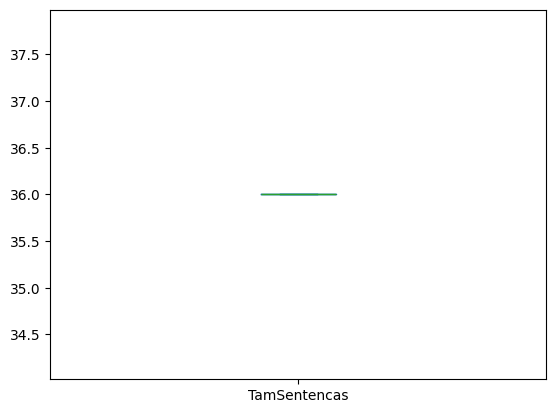

In [38]:
# Uma visualização rápida dos dados numéricos do DataFrame através de um Box Plot

df_alencar.plot.box();

In [39]:
# Função que recebe uma string e retorna o número de advérbios encontrados nela

def n_advs(sent: str) -> list:
    doc = nlp(sent)
    return len([t.pos_ for t in doc if t.pos_ == 'ADV'])

In [40]:
n_advs('Teste de não dar nunca nada certo certamente.')

3

In [41]:
# Aplicação da função a um df

df_alencar['Advs'] = df_alencar['Sentencas'].apply(n_advs)
df_alencar.sample()  # Para exemplificar

,Sentencas,TamSentencas,Advs
0,O pão francês não foi entregue hoje.,36,2


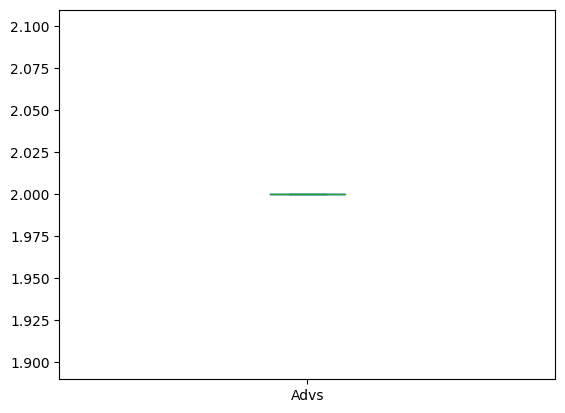

In [42]:
# Box Plot para os advérbios (semelhante aos de tamanhos de sentenças)

df_alencar['Advs'].plot.box();

In [43]:
# O módulo matplotlib oferece mais poder e versatilidade com gráficos que o Pandas
# Com ele, fica fácil gerar gráficos diretamente de listas, como faremos a seguir

import matplotlib.pyplot as plt

In [44]:
df_nabuco.head()

NameError: name 'df_nabuco' is not defined

In [45]:
# Vamos acrescentar uma coluna de advérbios aos demais DFs

df_nabuco['Advs'] = df_nabuco['Sentencas'].apply(n_advs)

NameError: name 'df_nabuco' is not defined

In [46]:
# Agora, será possível compará-los por box plots

adverbios = [i['Advs'].values.tolist() for i in [df_alencar, df_nabuco]]
plt.boxplot(adverbios);

NameError: name 'df_nabuco' is not defined

# Tarefa: Linguística Forense

Seu grupo de especialistas em PLN foi chamado para periciar um livro escrito por um autor incógnito. Há três elementos suspeitos de ser o autor da obra. Todos negam veementemente a autoria, mas sabe-se que o autor é um deles. Os suspeitos são:

* Machado de Assis, autor de "Dom Casmurro"
* José de Alencar, autor de "O Guarani"
* Joaquim Nabuco, autor de "O Abolicionismo"

Você tem à disposição esses três livros para comparar com o livro apócrifo.

Em suas análises, use alguns dos recursos comuns da Linguística Forense:

* Análise das divisões de período. Você pode usar somente o tamanho das sentenças, para simplificar, mas uma análise mais completa incluiria todos os delimitadores (vírgula, ponto-e-vírgula, dois pontos, travessão, parênteses...);
* Comparação das colocações adverbiais, em especial os modais (etiqueta de dependência: "advmod") e as conjunções subordinativas ("que" e "se"; etiqueta: "sconj").

A solução do problema deve ser representada num gráfico com duas ou três dimensões, em que cada dimensão expressa uma métrica de comparação, como divisão de período / advérbios modais, por exemplo.

Ao final, responda: quem é o autor do livro apócrifo?